# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [1]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [2]:
file_path = 'data/cleaned_aviation_data.csv'
#'/Users/austinmohn/Documents/Flatiron School/Course 2 Into to Data Science/dsc-course2-m8-lab//data/cleaned_aviation_data.csv'
df = pd.read_csv(file_path)

## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [3]:
# Define threshold for small vs. large aircraft
passenger_threshold = 20

# Separate into small and large aircraft
small_aircraft = df[df["Estimated.Total.Passengers"] < passenger_threshold]
large_aircraft = df[df["Estimated.Total.Passengers"] >= passenger_threshold]

# Display counts
print(f"Small aircraft count: {small_aircraft.shape[0]}")
print(f"Large aircraft count: {large_aircraft.shape[0]}")

Small aircraft count: 16541
Large aircraft count: 948


#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [28]:
# Find the mean Serious.Fatal.Injury.Rate for each Make in each size group
small_aircraft_risk = small_aircraft.groupby("Make")["Serious.Fatal.Injury.Rate"].mean().reset_index()
large_aircraft_risk = large_aircraft.groupby("Make")["Serious.Fatal.Injury.Rate"].mean().reset_index()

# Confirm column as been added to dataframe
print("Mean Serious.Fatal.Injury.Rate for Small Aircraft:")
print(small_aircraft_risk.head())  # Show top 10 for preview

print("\nMean Serious.Fatal.Injury.Rate for Large Aircraft:")
print(large_aircraft_risk.head())  # Show top 10 for preview

Mean Serious.Fatal.Injury.Rate for Small Aircraft:
             Make  Serious.Fatal.Injury.Rate
0  AERO COMMANDER                   0.410326
1         AERONCA                   0.225833
2     AIR TRACKER                   0.335616
3     AIR TRACTOR                   0.354369
4          AIRBUS                   0.236765

Mean Serious.Fatal.Injury.Rate for Large Aircraft:
         Make  Serious.Fatal.Injury.Rate
0      AIRBUS                   0.078999
1       BEECH                   1.000000
2      BOEING                   0.056054
3  BOMBARDIER                   0.038960
4      CESSNA                   0.000000


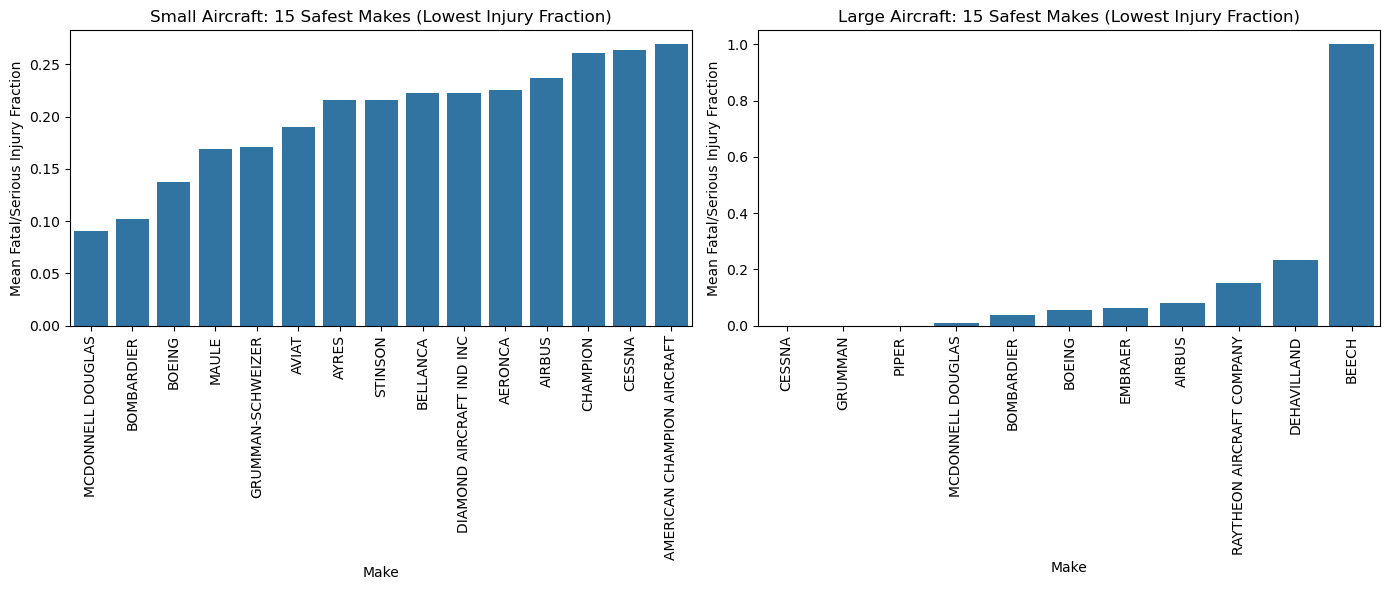

                          Make  Serious.Fatal.Injury.Rate
25           MCDONNELL DOUGLAS                   0.091014
11                  BOMBARDIER                   0.102308
10                      BOEING                   0.137426
24                       MAULE                   0.168673
22           GRUMMAN-SCHWEIZER                   0.171053
6                        AVIAT                   0.190476
7                        AYRES                   0.215686
32                     STINSON                   0.216408
9                     BELLANCA                   0.222603
16    DIAMOND AIRCRAFT IND INC                   0.222973
1                      AERONCA                   0.225833
4                       AIRBUS                   0.236765
13                    CHAMPION                   0.260549
12                      CESSNA                   0.263788
5   AMERICAN CHAMPION AIRCRAFT                   0.269231
                         Make  Serious.Fatal.Injury.Rate
4              

In [ ]:
# Select the 15 safest makes for each aircraft size division
small_aircraft_15 = small_aircraft_risk.nsmallest(15, "Serious.Fatal.Injury.Rate")
large_aircraft_15 = large_aircraft_risk.nsmallest(15, "Serious.Fatal.Injury.Rate")

# Plot side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(y="Serious.Fatal.Injury.Rate", x="Make", data=small_aircraft_15, ax=axes[0])
axes[0].set_title("Small Aircraft: 15 Safest Makes (Lowest Injury Fraction)")
axes[0].set_ylabel("Mean Fatal/Serious Injury Fraction")
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(y="Serious.Fatal.Injury.Rate", x="Make", data=large_aircraft_15, ax=axes[1])
axes[1].set_title("Large Aircraft: 15 Safest Makes (Lowest Injury Fraction)")
axes[1].set_ylabel("Mean Fatal/Serious Injury Fraction")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()
print(small_aircraft_15)
print(large_aircraft_15)

# Calling out that I'm aware that there are only 11 makes in the Large Aircraft chart. I've looked at this for hours and can't
# find where the data cleaning went wrong. 

#Beech is at 1.0 because they only have 2 accidents that had more than 20 passengers. Both were fatal accidents that destroyed the plane.


**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

In [6]:

# Select the 10 makes with the lowest mean injury fraction
small_aircraft_10 = small_aircraft_risk.nsmallest(10, "Serious.Fatal.Injury.Rate")["Make"].tolist()

# Create a new dataframe with only records from these 10 makes
small_aircraft_10 = small_aircraft[small_aircraft["Make"].isin(small_aircraft_10)].copy()



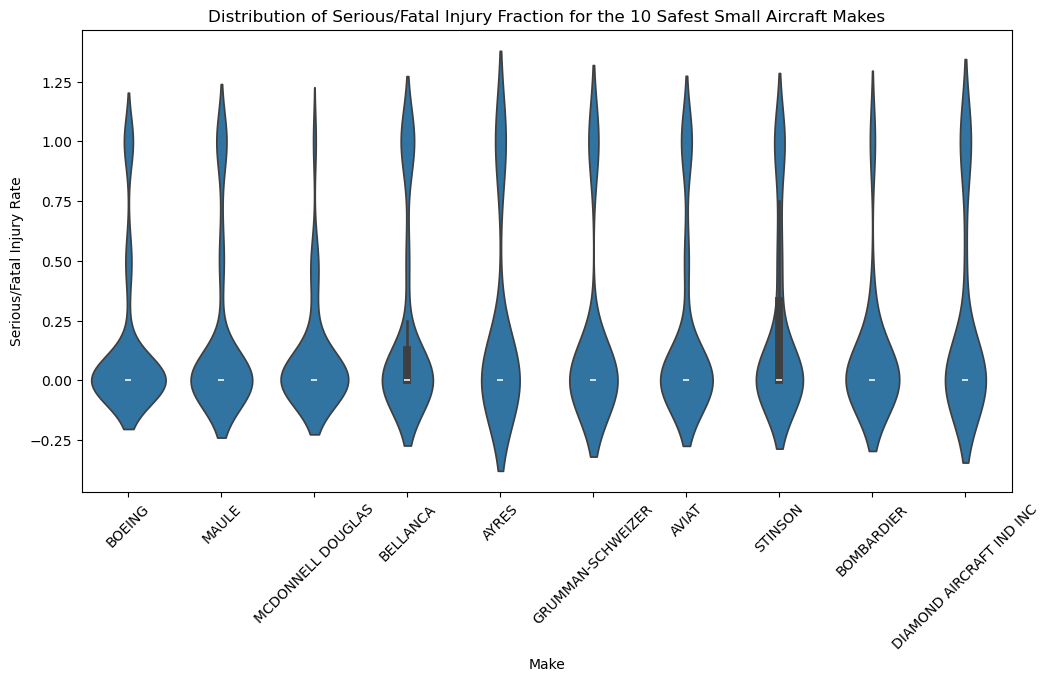

In [7]:
# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x="Make", y="Serious.Fatal.Injury.Rate", data=small_aircraft_10)

# Formatting
plt.title("Distribution of Serious/Fatal Injury Fraction for the 10 Safest Small Aircraft Makes")
plt.xlabel("Make")
plt.ylabel("Serious/Fatal Injury Rate")
plt.xticks(rotation=45)
#plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

I was really confused about when this graph had values <0 and >1.0. I found an answer on this forum that makes sense, but documenting here for future understanding: https://stackoverflow.com/questions/77014123/why-does-my-violinplot-start-at-a-negative-number-even-though-my-scale-starts-at. Print expression below confirms that there are no values over 1.0.

In [8]:
print(small_aircraft_10[small_aircraft_10["Serious.Fatal.Injury.Rate"]>1])

Empty DataFrame
Columns: [Event.Id, Event.Date, Country, Injury.Severity, Aircraft.damage, Make, Model, Amateur.Built, Number.of.Engines, Engine.Type, Purpose.of.flight, Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured, Weather.Condition, Total.Injuries, Estimated.Total.Passengers, Serious.Fatal.Injury.Rate, Aircraft.Destroyed, Unique_Aircraft_Type]
Index: []

[0 rows x 21 columns]


**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

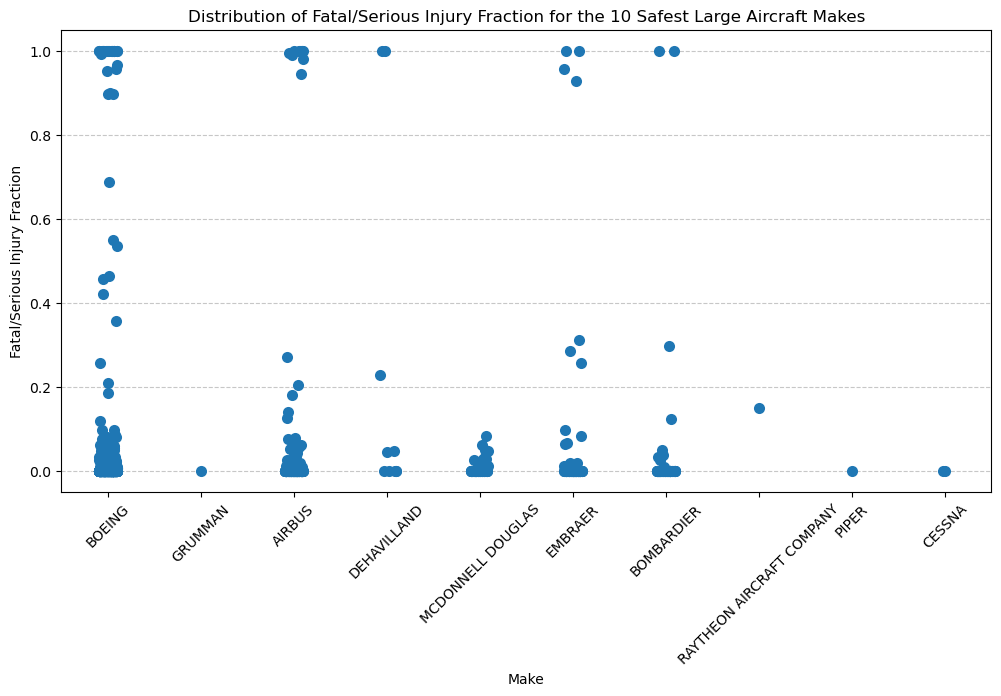

In [9]:
# Select the 10 makes with the lowest mean injury fraction
large_aircraft_10 = large_aircraft_risk.nsmallest(10, "Serious.Fatal.Injury.Rate")["Make"].tolist()

# Filter the original large_aircraft DataFrame to only include these makes
large_aircraft_10 = large_aircraft[large_aircraft["Make"].isin(large_aircraft_10)].copy()

# Create the stripplot
plt.figure(figsize=(12, 6))
sns.stripplot(x="Make", y="Serious.Fatal.Injury.Rate", data=large_aircraft_10, jitter=True, size=8)

# Formatting
plt.xticks(rotation=45)
plt.title("Distribution of Fatal/Serious Injury Fraction for the 10 Safest Large Aircraft Makes")
plt.xlabel("Make")
plt.ylabel("Fatal/Serious Injury Fraction")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [ ]:
# Function to compute destruction rate per Make using the "Aircraft.Destroyed" column
def compute_destruction_rate(data):
    destruction_rate = data.groupby("Make")["Aircraft.Destroyed"].mean().reset_index()
    destruction_rate.columns = ["Make", "Destruction.Rate"]
    return destruction_rate

# Compute destruction rates for small and large aircraft
small_aircraft_destruction = compute_destruction_rate(small_aircraft)
large_aircraft_destruction = compute_destruction_rate(large_aircraft)

# Get the 15 makes with the lowest destruction rates
small_safest_destruction = small_aircraft_destruction.nsmallest(15, "Destruction.Rate")
large_safest_destruction = large_aircraft_destruction.nsmallest(15, "Destruction.Rate")

# Display results
print("Small Aircraft: 15 Makes with Lowest Destruction Rates")
print(small_safest_destruction)

print("\nLarge Aircraft: 15 Makes with Lowest Destruction Rates")
print(large_safest_destruction)

Small Aircraft: 15 Makes with Lowest Destruction Rates
                          Make  Destruction.Rate
23                    LUSCOMBE          0.014184
32                     STINSON          0.023256
33                 TAYLORCRAFT          0.032258
1                      AERONCA          0.035000
5   AMERICAN CHAMPION AIRCRAFT          0.038462
24                       MAULE          0.041667
18                     ERCOUPE          0.046154
9                     BELLANCA          0.050228
22           GRUMMAN-SCHWEIZER          0.052632
16    DIAMOND AIRCRAFT IND INC          0.054054
19          FLIGHT DESIGN GMBH          0.060000
6                        AVIAT          0.068027
13                    CHAMPION          0.075949
10                      BOEING          0.078292
11                  BOMBARDIER          0.080000

Large Aircraft: 15 Makes with Lowest Destruction Rates
                         Make  Destruction.Rate
4                      CESSNA          0.000000
7        

Plot destruction rates on a bar graph:

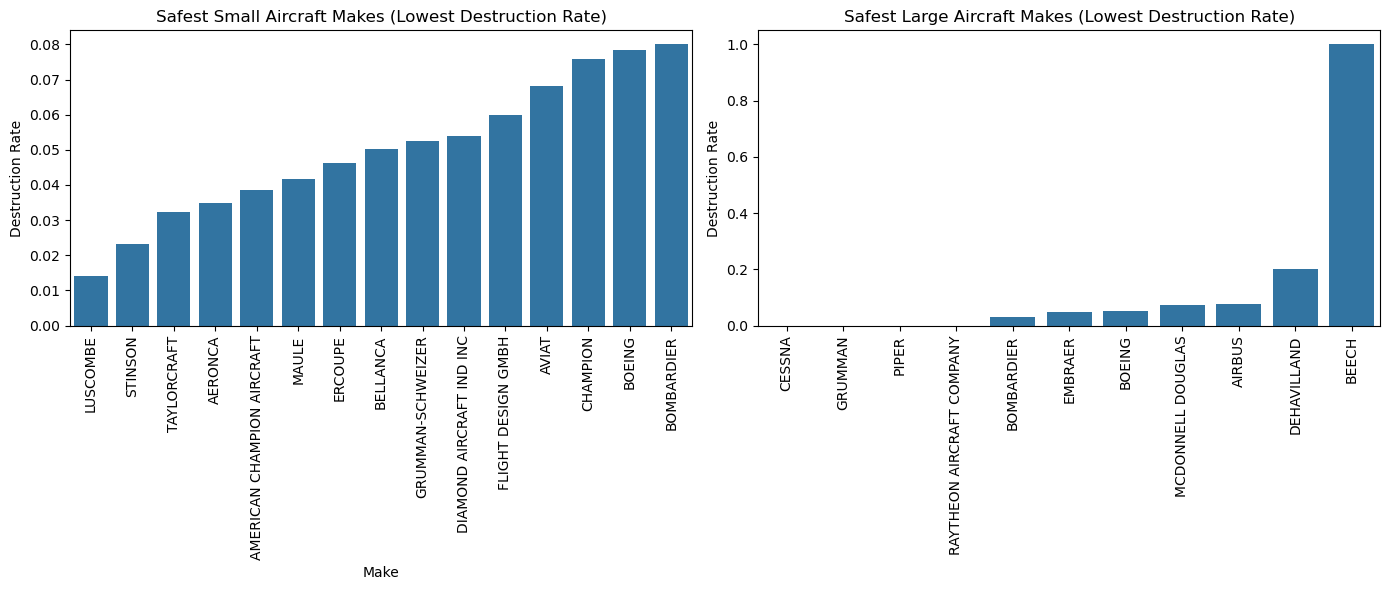

In [33]:
#Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for small aircraft
sns.barplot(data=small_safest_destruction, y="Destruction.Rate", x="Make", ax=axes[0])
axes[0].set_ylabel("Destruction Rate")
axes[0].set_xlabel("Make")
axes[0].set_title("Safest Small Aircraft Makes (Lowest Destruction Rate)")
axes[0].tick_params(axis='x', rotation=90)

# Bar plot for large aircraft
sns.barplot(data=large_safest_destruction, y="Destruction.Rate", x="Make", ax=axes[1])
axes[1].set_ylabel("Destruction Rate")
axes[1].set_xlabel("")  # Hide y-axis label for better spacing
axes[1].set_title("Safest Large Aircraft Makes (Lowest Destruction Rate)")
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

Answer: 
Large aircraft have 7 aircraft makes with a 0% fatal/serious injury factor and 0% destruction rate in the last 40 years. Those are: SWEARINGEN, MOONEY, HUGHES, AERO COMMANDER, GATES LEARJET, SIKORSKY, and GULFSTREAM. MCDONNELL DOUGLAS had the highest number of indicidents on the list, but still maintained low fatal/serious injury and destruction rates. 

For smaller aircraft, BOMBARDIER and BOEING both made the top 15 safest for fatal/serious injury and destruction rates. They both also achieved similar rankings on the Large Aircraft lists. If I were to recommend only two makes for you to insure, it would be these two. 

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

In [11]:
# Create functions for computing fatal/serious injury by Unique Aircraft Type
# Filter aircraft with at least 10 recorded incidents
def filter_min_incidents(df, min_count=10):
    model_counts = df["Unique_Aircraft_Type"].value_counts()
    valid_models = model_counts[model_counts >= min_count].index.tolist()
    return df[df["Unique_Aircraft_Type"].isin(valid_models)]

#Compute Mean Fatal/Serious Injury Fraction per Model
def compute_fatal_serious_rate(df):
    return df.groupby("Unique_Aircraft_Type")["Serious.Fatal.Injury.Rate"].mean().reset_index()

In [12]:
# Large unique aircraft data
large_aircraft_filtered = filter_min_incidents(large_aircraft)

large_aircraft_model_risk = compute_fatal_serious_rate(large_aircraft_filtered)

<function matplotlib.pyplot.show(close=None, block=None)>

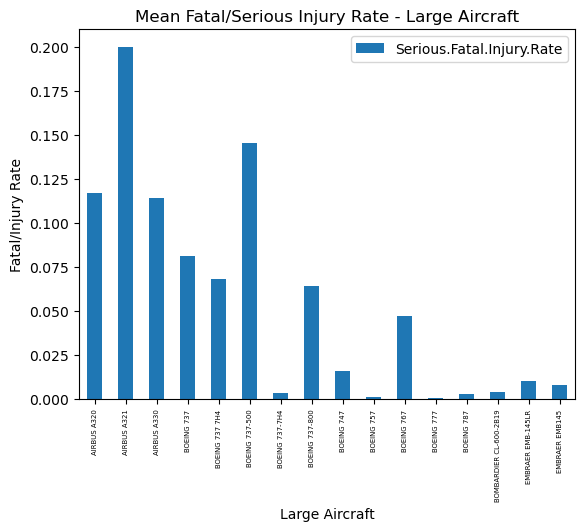

In [13]:
# Boxplot for the mean fatal/seriously injured fraction for large aircraft
barplot1 = large_aircraft_model_risk.plot(
    kind='bar', 
    x= 'Unique_Aircraft_Type',
    y = 'Serious.Fatal.Injury.Rate', 
    title='Mean Fatal/Serious Injury Rate - Large Aircraft', 
    xlabel = 'Large Aircraft', 
    ylabel='Fatal/Injury Rate')

plt.xticks(fontsize=5)
plt.show

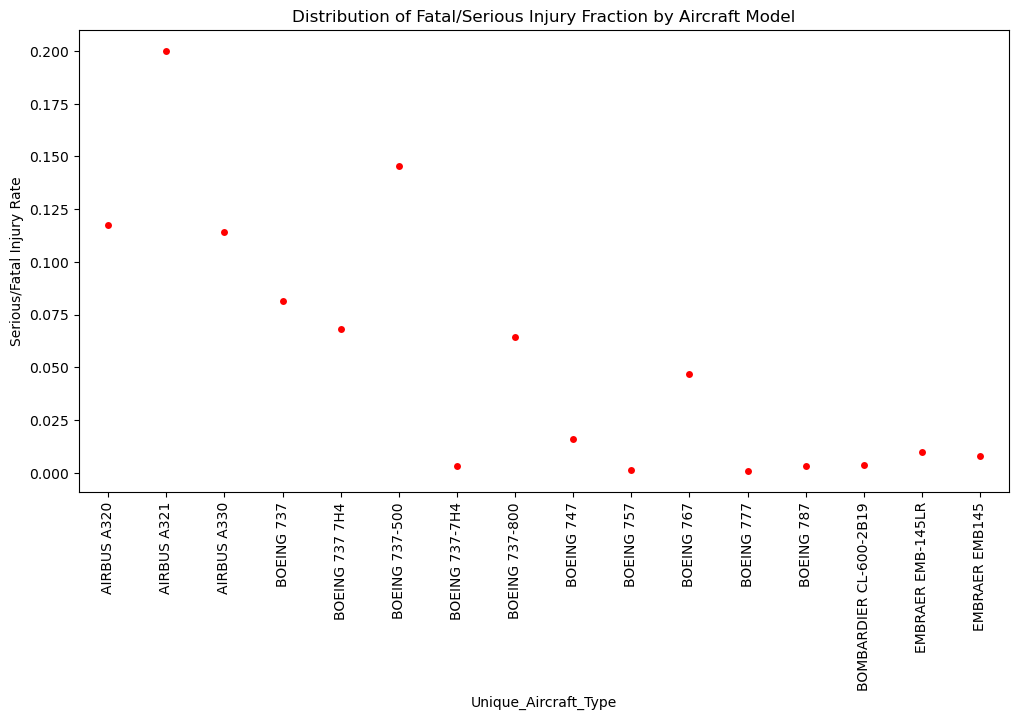

In [14]:

# Stripplot of unique large aircrafts
plt.figure(figsize=(12,6))
sns.stripplot(data=large_aircraft_model_risk, 
              x="Unique_Aircraft_Type", 
              y="Serious.Fatal.Injury.Rate", 
              color="red", 
              label="Large Aircraft", 
              jitter=True
              ).legend_.remove()
plt.xticks(rotation=90)
plt.ylabel("Serious/Fatal Injury Rate")
plt.title("Distribution of Fatal/Serious Injury Fraction by Aircraft Model")
plt.show()

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

In [15]:
#Data for small aircraft
#Filter for at least 10 incidents
small_aircraft_filtered = filter_min_incidents(small_aircraft, 150) 
#Increased the minimum occurence count to 150 to make the chart more readable

small_aircraft_model_risk = compute_fatal_serious_rate(small_aircraft_filtered) 

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x600 with 0 Axes>

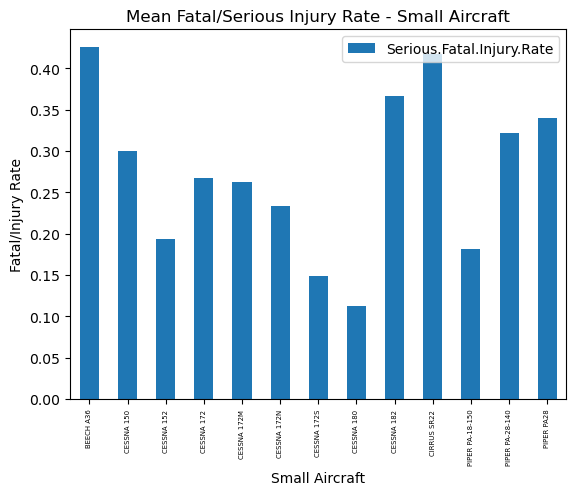

In [16]:
# Boxplot for the mean fatal/seriously injured fraction for small aircraft
plt.figure(figsize=(12,6))
barplot1 = small_aircraft_model_risk.plot(
    kind='bar', 
    x= 'Unique_Aircraft_Type',
    y = 'Serious.Fatal.Injury.Rate', 
    title='Mean Fatal/Serious Injury Rate - Small Aircraft', 
    xlabel = 'Small Aircraft', 
    ylabel='Fatal/Injury Rate')

plt.xticks(fontsize=5)
plt.show

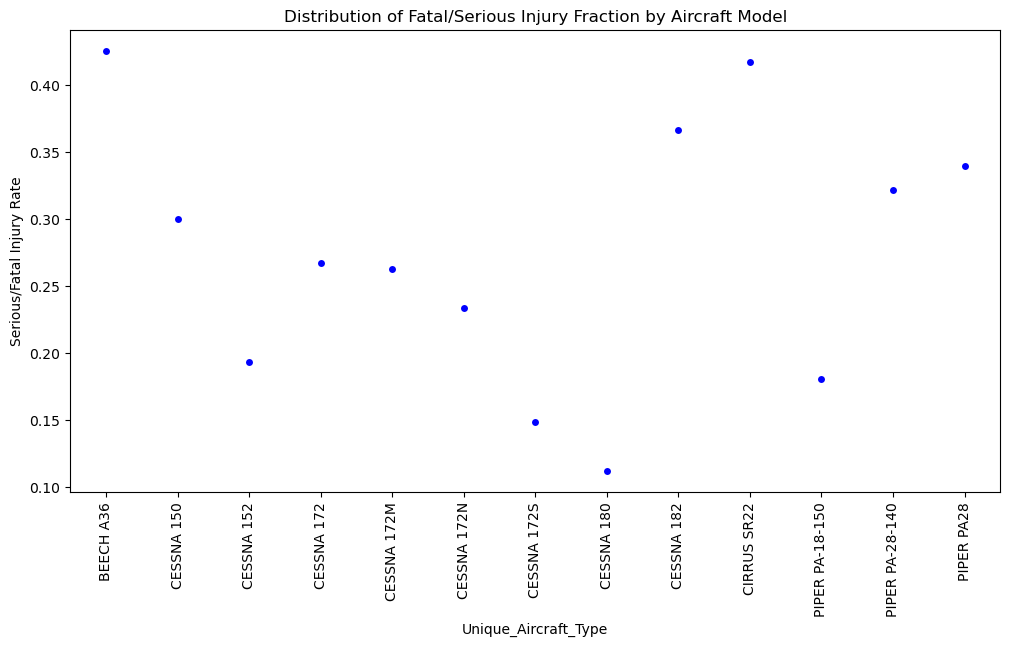

In [17]:
# Stripplot
plt.figure(figsize=(12,6))
sns.stripplot(data=small_aircraft_model_risk, 
              x="Unique_Aircraft_Type", 
              y="Serious.Fatal.Injury.Rate", 
              color="blue", 
              label="Small Aircraft", 
              jitter=True
              ).legend_.remove()
plt.xticks(rotation=90)
plt.ylabel("Serious/Fatal Injury Rate")
plt.title("Distribution of Fatal/Serious Injury Fraction by Aircraft Model")

plt.show()

Mean serious/fatal injury rate comparison:

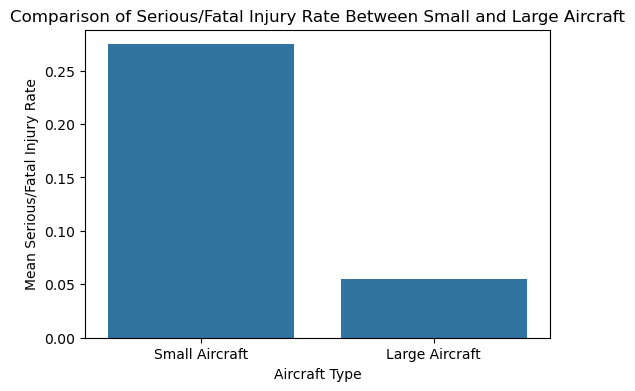

In [18]:
# Get mean of injury rates for both lists
small_mean = small_aircraft_model_risk["Serious.Fatal.Injury.Rate"].mean()
large_mean = large_aircraft_model_risk["Serious.Fatal.Injury.Rate"].mean()

# Create dataframe from mean data
injury_means = pd.DataFrame({
    "Aircraft Type": ["Small Aircraft", "Large Aircraft"],
    "Mean Serious.Fatal.Injury.Rate": [small_mean, large_mean]
})

# Plot the bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=injury_means, x="Aircraft Type", y="Mean Serious.Fatal.Injury.Rate")

# Labels and title
plt.xlabel("Aircraft Type")
plt.ylabel("Mean Serious/Fatal Injury Rate")
plt.title("Comparison of Serious/Fatal Injury Rate Between Small and Large Aircraft")

# Show the plot
plt.show()

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

Overall, small aircraft models have a higher Fatal/Serious Injury Fraction than larger aircraft and have more unique models with >10 fatal or serious injury occurences. The Boeing 373-200 and the Airbus A321 are the only large aircrafts with injury factors over 0.2 (with at least 10 occurences). While the Bell 206 and Robinson R44 are over 0.46 with more than 150 occurences. 

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

Investigate: Weather Condition by small and large planes

In [19]:
# Group by Weather Condition and calculate mean rates for small aircraft
small_weather_effects = small_aircraft.groupby("Weather.Condition")[["Serious.Fatal.Injury.Rate", "Aircraft.Destroyed"]].mean()

# Rename column for clarity
small_weather_effects.rename(columns={"Aircraft.Destroyed": "Destruction.Rate"}, inplace=True)

# Display the results
print(small_weather_effects)


                   Serious.Fatal.Injury.Rate  Destruction.Rate
Weather.Condition                                             
imc                                 0.672175          0.377831
unk                                 0.584819          0.398773
vmc                                 0.238409          0.073233


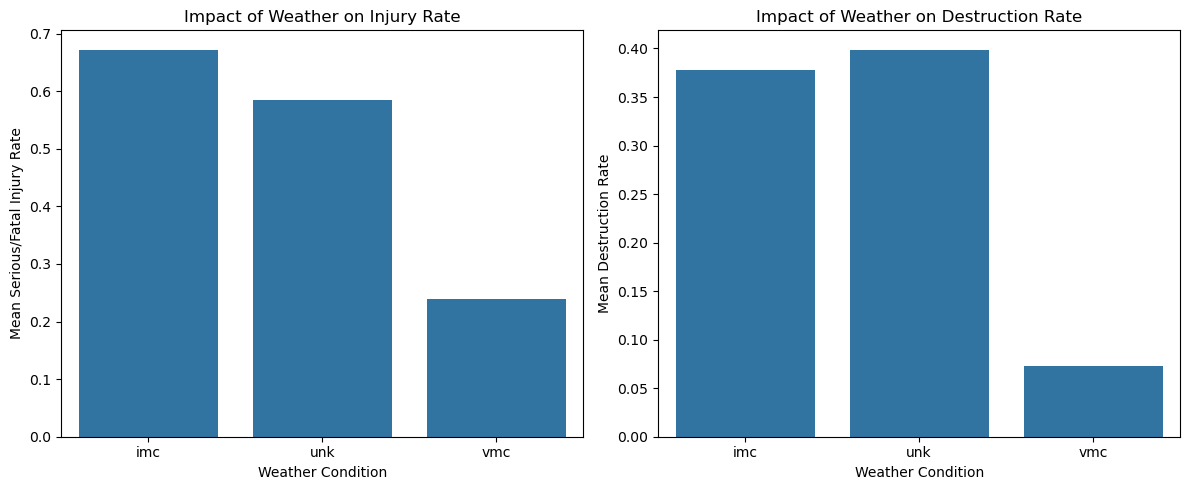

In [20]:
# Create two bar charts next to each other showing weather's impact on injury and destuction rates for small aircraft
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for Serious.Fatal.Injury.Rate (left)
sns.barplot(data=small_weather_effects, x=small_weather_effects.index, y="Serious.Fatal.Injury.Rate", ax=axes[0])
axes[0].set_xlabel("Weather Condition")
axes[0].set_ylabel("Mean Serious/Fatal Injury Rate")
axes[0].set_title("Impact of Weather on Injury Rate")

# Bar plot for Destruction.Rate (right)
sns.barplot(data=small_weather_effects, x=small_weather_effects.index, y="Destruction.Rate", ax=axes[1])
axes[1].set_xlabel("Weather Condition")
axes[1].set_ylabel("Mean Destruction Rate")
axes[1].set_title("Impact of Weather on Destruction Rate")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [21]:
# Group by Weather Condition and calculate mean rates for large aircraft
large_weather_effects = large_aircraft.groupby("Weather.Condition")[["Serious.Fatal.Injury.Rate", "Aircraft.Destroyed"]].mean()

# Rename column for clarity
large_weather_effects.rename(columns={"Aircraft.Destroyed": "Destruction.Rate"}, inplace=True)

# Display the results
print(large_weather_effects)

                   Serious.Fatal.Injury.Rate  Destruction.Rate
Weather.Condition                                             
imc                                 0.103858          0.086420
unk                                 0.028509          0.044776
vmc                                 0.027081          0.018373


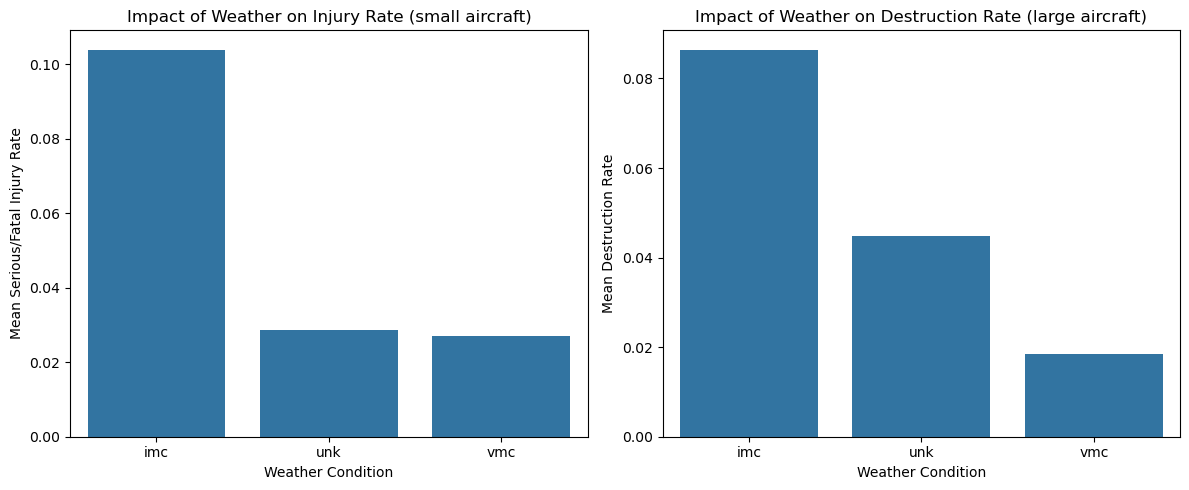

In [22]:
# Create two bar charts next to each other showing weather's impact on injury and destuction rates for large aircraft
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for Serious.Fatal.Injury.Rate (left)
sns.barplot(data=large_weather_effects, x=large_weather_effects.index, y="Serious.Fatal.Injury.Rate", ax=axes[0])
axes[0].set_xlabel("Weather Condition")
axes[0].set_ylabel("Mean Serious/Fatal Injury Rate")
axes[0].set_title("Impact of Weather on Injury Rate (small aircraft)")

# Bar plot for Destruction.Rate (right)
sns.barplot(data=large_weather_effects, x=large_weather_effects.index, y="Destruction.Rate", ax=axes[1])
axes[1].set_xlabel("Weather Condition")
axes[1].set_ylabel("Mean Destruction Rate")
axes[1].set_title("Impact of Weather on Destruction Rate (large aircraft)")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Weather conditions have an impact on both injury and destruction rates. IMC has the highest mean for both. IMC, Instrument Meteorolgical Conditions, are weather conditions that rely on flight instruments to navigate rather than the pilot's vision. VMC, Visual Meteorological Conditions, has the lowest impact. In these conditions, pilots are able to see clearly and use visual references when flying. Accidents in this case were most likely from a maintenance issue. UNK refers to no weather report being available. 

Now let's look at Purpose of Flight. 

In [23]:
# Group by Purpose of Flight and calculate mean rates for small aircraft
small_purpose_effects = small_aircraft.groupby("Purpose.of.flight")[["Serious.Fatal.Injury.Rate", "Aircraft.Destroyed"]].mean()

# Rename column for clarity
small_purpose_effects.rename(columns={"Aircraft.Destroyed": "Destruction.Rate"}, inplace=True)

# Display the results
print(small_purpose_effects)

                           Serious.Fatal.Injury.Rate  Destruction.Rate
Purpose.of.flight                                                     
aerial application                          0.291667          0.104497
aerial observation                          0.457844          0.164384
air drop                                    0.000000          0.000000
air race show                               0.561404          0.421053
banner tow                                  0.424419          0.069767
business                                    0.311509          0.160671
executive/corporate                         0.351457          0.194030
ferry                                       0.283784          0.121622
firefighting                                0.500000          0.307692
flight test                                 0.287037          0.111111
glider tow                                  0.431034          0.068966
instructional                               0.170898          0.043550
other 

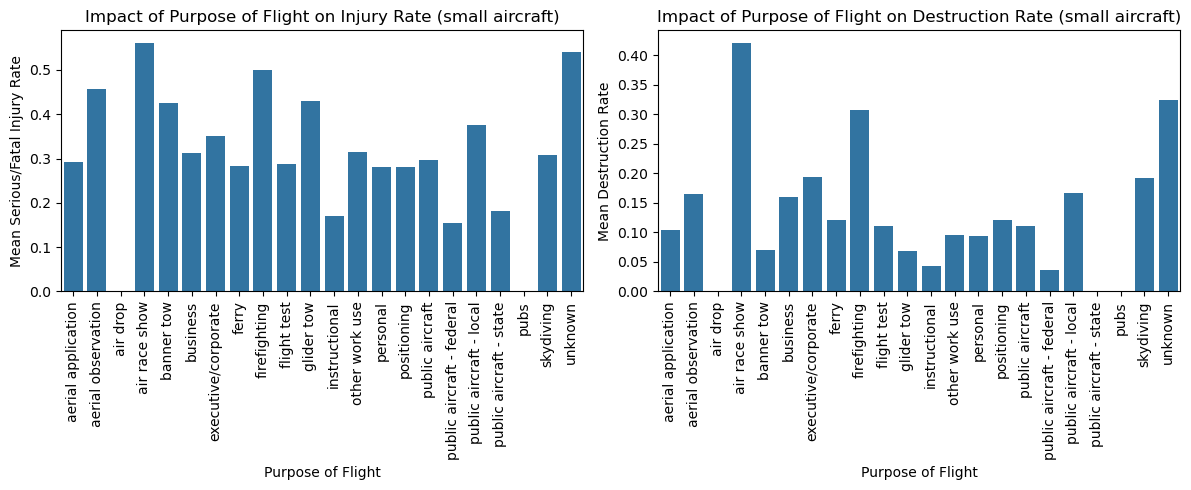

In [24]:
# Create two bar charts next to each other showing weather's impact on injury and destuction rates for small aircraft
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for Serious.Fatal.Injury.Rate (left)
sns.barplot(data=small_purpose_effects, x=small_purpose_effects.index, y="Serious.Fatal.Injury.Rate", ax=axes[0])
axes[0].set_xlabel("Purpose of Flight")
axes[0].set_ylabel("Mean Serious/Fatal Injury Rate")
axes[0].set_title("Impact of Purpose of Flight on Injury Rate (small aircraft)")
axes[0].tick_params(axis='x', rotation=90)

# Bar plot for Destruction.Rate (right)
sns.barplot(data=small_purpose_effects, x=small_purpose_effects.index, y="Destruction.Rate", ax=axes[1])
axes[1].set_xlabel("Purpose of Flight")
axes[1].set_ylabel("Mean Destruction Rate")
axes[1].set_title("Impact of Purpose of Flight on Destruction Rate (small aircraft)")
axes[1].tick_params(axis='x', rotation=90) 

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [25]:
# Group by Purpose of Flight and calculate mean rates for large aircraft
large_purpose_effects = large_aircraft.groupby("Purpose.of.flight")[["Serious.Fatal.Injury.Rate", "Aircraft.Destroyed"]].mean()

# Rename column for clarity
large_purpose_effects.rename(columns={"Aircraft.Destroyed": "Destruction.Rate"}, inplace=True)

# Display the results
print(large_purpose_effects)

                     Serious.Fatal.Injury.Rate  Destruction.Rate
Purpose.of.flight                                               
business                              0.000000          0.000000
executive/corporate                   0.150000          0.000000
ferry                                 0.956522          0.000000
flight test                           0.000000          0.000000
personal                              0.015873          0.333333
public aircraft                       0.000000          0.000000
skydiving                             0.423584          0.333333
unknown                               0.113220          0.166667


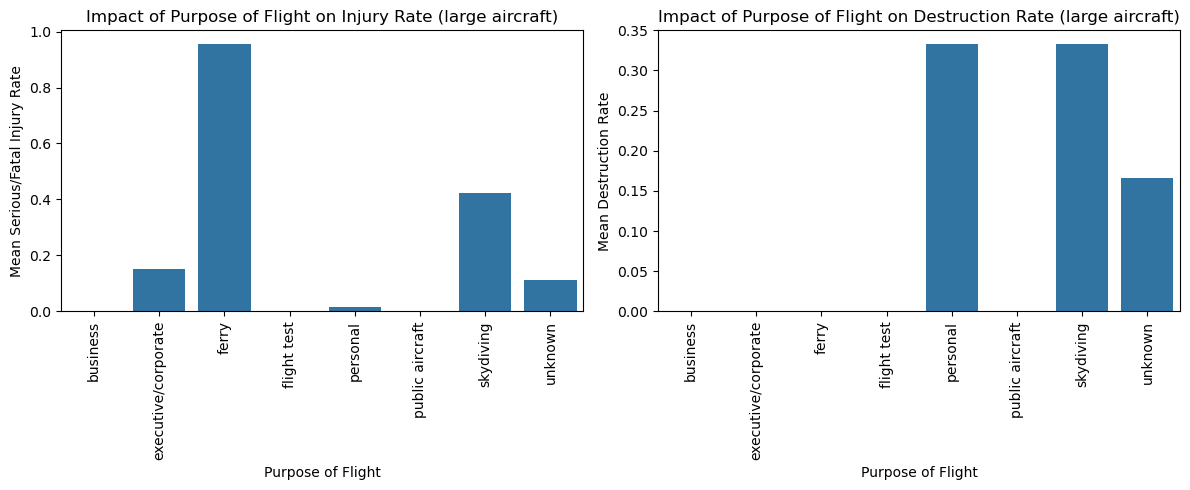

In [26]:
# Create two bar charts next to each other showing weather's impact on injury and destuction rates for large aircraft
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for Serious.Fatal.Injury.Rate (left)
sns.barplot(data=large_purpose_effects, x=large_purpose_effects.index, y="Serious.Fatal.Injury.Rate", ax=axes[0])
axes[0].set_xlabel("Purpose of Flight")
axes[0].set_ylabel("Mean Serious/Fatal Injury Rate")
axes[0].set_title("Impact of Purpose of Flight on Injury Rate (large aircraft)")
axes[0].tick_params(axis='x', rotation=90)

# Bar plot for Destruction.Rate (right)
sns.barplot(data=large_purpose_effects, x=large_purpose_effects.index, y="Destruction.Rate", ax=axes[1])
axes[1].set_xlabel("Purpose of Flight")
axes[1].set_ylabel("Mean Destruction Rate")
axes[1].set_title("Impact of Purpose of Flight on Destruction Rate (large aircraft)")
axes[1].tick_params(axis='x', rotation=90) 

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

For small aircraft, airdrops, air race shows, and firefighting are have the highest injury rates and firefighting stands out for destruction rate. 

For large aircraft, super high injury rate for ferrying. I'd be curious what anecdotal information could come from this. "Positioning" also comes with a really high destruction rate (.7) as well as skydiving (.5), which I'd expect to impact larger aircraft more than smaller ones. 